### IS 2053-001 Stock Data Analysis Project
Authors: Steven Kubecka and Cody Snyder

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


### Global Variables
The Main Data Frame with the data from the .csv file to be used throughout the project

In [ ]:
#read file into data frame
df = pd.read_csv("data/15 Years Stock Data of NVDA AAPL MSFT GOOGL and AMZN.csv", parse_dates=["Date"])
CLOSING_PRICE_COLS = ["Close_AAPL", "Close_AMZN", "Close_GOOGL", "Close_MSFT", "Close_NVDA"] #Columns names for the closing prices of each stock
VOLUME_COLS = ["Volume_AAPL","Volume_AMZN", "Volume_GOOGL", "Volume_MSFT", "Volume_NVDA"] #Columns names for the volumes traded of each stock
RENAME_COLS = ["$AAPL", "$AMZN", "$GOOGL", "$MSFT", "$NVDA"] #Column renames for the output

### First 5 Rows
(Remove later)
Used as a example to visualize rows and columns of the csv file.

In [3]:
df.head()

,Date,Close_AAPL,Close_AMZN,Close_GOOGL,Close_MSFT,Close_NVDA,High_AAPL,High_AMZN,High_GOOGL,High_MSFT,...,Open_AAPL,Open_AMZN,Open_GOOGL,Open_MSFT,Open_NVDA,Volume_AAPL,Volume_AMZN,Volume_GOOGL,Volume_MSFT,Volume_NVDA
0,2010-01-04,6.440330,6.6950,15.609805,23.254051,0.423884,6.455075,6.8305,15.678546,23.366752,...,6.422875,6.8125,15.614786,23.006108,0.424342,493729600,151998000,78169752,38409100,800204000
1,2010-01-05,6.451465,6.7345,15.541064,23.261557,0.430073,6.487878,6.7740,15.636953,23.366746,...,6.458086,6.6715,15.620515,23.178910,0.422279,601904800,177038000,120067812,49749600,728648000
2,2010-01-06,6.348847,6.6125,15.149294,23.118809,0.432824,6.477046,6.7365,15.587638,23.351725,...,6.451466,6.7300,15.587638,23.201455,0.429844,552160000,143576000,158988852,58182400,649168000
3,2010-01-07,6.337109,6.5000,14.796624,22.878376,0.424342,6.379842,6.6160,15.192630,23.066212,...,6.372319,6.6005,15.177685,23.013616,0.430532,477131200,220604000,256315428,50559700,547792000
4,2010-01-08,6.379242,6.6760,14.993881,23.036165,0.425259,6.379844,6.6840,15.024515,23.201460,...,6.328685,6.5280,14.744323,22.750656,0.420903,447610800,196610000,188783028,51197400,478168000


### Question 1. Annual Percent Change

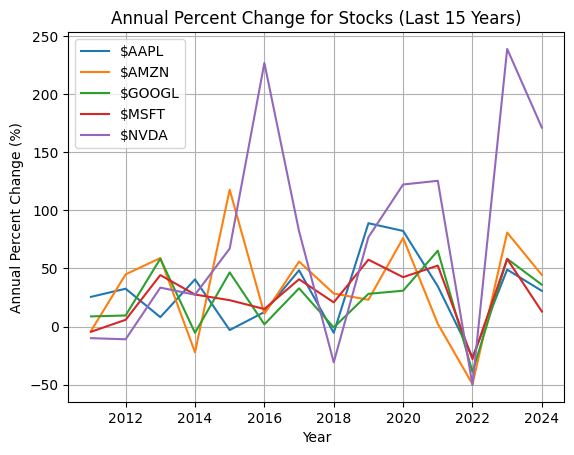

,$AAPL,$AMZN,$GOOGL,$MSFT,$NVDA
Year,,,,,
2010,NaN,NaN,NaN,NaN,NaN
2011,25.56,-3.83,8.74,-4.52,-10.00
2012,32.57,44.93,9.52,5.80,-10.97
2013,8.07,58.96,58.43,44.30,33.52
2014,40.62,-22.18,-5.39,27.56,27.40
2015,-3.01,117.78,46.61,22.69,67.12
2016,12.48,10.95,1.86,15.08,226.96
2017,48.46,55.96,32.93,40.73,81.99
2018,-5.39,28.43,-0.80,20.80,-30.82


In [4]:
df["Year"] = df["Date"].dt.year #creates a new column for the year
aar = df.groupby("Year")[CLOSING_PRICE_COLS].last().pct_change()*100 #Groups the data by year and calculates the percent change
aar = aar.round(2) #Round the percentages to 2 decimal places
aar.columns = RENAME_COLS #Renames Columns for better clarity
for stock in RENAME_COLS: #loops though each stock
    plt.plot(aar.index, aar[stock], label=stock) #plots the graph you see below
plt.xlabel("Year") #x axis label
plt.ylabel("Annual Percent Change (%)") #y axis label
plt.title("Annual Percent Change for Stocks (Last 15 Years)") #title
plt.legend() #adds a legend
plt.grid() #adds a grid
plt.show() #displays the line graph
aar #outputs the table

#### Take Aways
- All of these stocks belong to the tech sector and by viewing the graph we can see for the most part they move together with some exceptions. For example all the stocks in 2022 lost over 25% of their value.
- This graph also makes it easy to spot outliers none more obvious than $NVDA in 2016 and 2017 which massive outperformed the other tech stocks.
- The graph also displays the volatility of the stocks with the less volatile stocks having flatter lines with less extreme peaks like $GOOGL and $MSFT and the more volatile stocks like $AMZN and $NVDA.
- 

### Question 2: Which year did each company have their highest and lowest shares?

In [5]:
# Define a function to find the years with the highest and lowest share prices for each company
def find_highest_and_lowest_years(df, CLOSING_PRICE_COLS):
    # Find the rows corresponding to the highest closing prices for each stock
    highest_years = df.loc[df[CLOSING_PRICE_COLS].idxmax()]
    # Find the rows corresponding to the lowest closing prices for each stock
    lowest_years = df.loc[df[CLOSING_PRICE_COLS].idxmin()]

    # Extract the 'Date' and closing price columns for the highest and lowest prices
    highest_years = highest_years[["Date"] + CLOSING_PRICE_COLS]
    lowest_years = lowest_years[["Date"] + CLOSING_PRICE_COLS]

    # Add a 'Year' column for clarity, extracted from the 'Date' column
    highest_years["Year"] = highest_years["Date"].dt.year
    lowest_years["Year"] = lowest_years["Date"].dt.year

    # Round the closing prices to two decimal places for better readability
    highest_years[CLOSING_PRICE_COLS] = highest_years[CLOSING_PRICE_COLS].round(2)
    lowest_years[CLOSING_PRICE_COLS] = lowest_years[CLOSING_PRICE_COLS].round(2)

    # Return the dataframes containing the highest and lowest years with their prices
    return highest_years, lowest_years

# Call the function to find the highest and lowest years for each stock
highest_years, lowest_years = find_highest_and_lowest_years(df, CLOSING_PRICE_COLS)

# Display the highest share prices by year in a transposed format for better readability
print("Highest Share Prices by Year:")
print(highest_years[["Year"] + CLOSING_PRICE_COLS].set_index("Year").T)

# Display the lowest share prices by year in a transposed format for better readability
print("\nLowest Share Prices by Year:")
print(lowest_years[["Year"] + CLOSING_PRICE_COLS].set_index("Year").T)


Highest Share Prices by Year:
Year           2024    2024    2024    2024    2024
Close_AAPL   258.74  250.76  250.76  225.58  226.98
Close_AMZN   227.05  232.93  232.93  200.00  210.05
Close_GOOGL  195.38  196.43  196.43  189.91  180.34
Close_MSFT   437.23  450.69  450.69  464.85  423.73
Close_NVDA   139.92  131.99  131.99  125.80  148.86

Lowest Share Prices by Year:
Year          2010   2010   2010   2010   2010
Close_AAPL    5.78   7.71   7.48   7.57   7.53
Close_AMZN    5.80   5.43   5.50   5.46   6.29
Close_GOOGL  13.12  11.31  10.86  11.08  12.25
Close_MSFT   20.92  17.68  18.06  17.45  18.85
Close_NVDA    0.36   0.24   0.23   0.23   0.20


### What to take from this information

The analysis of stock data and financial metrics can provide valuable insights for companies in several ways:

1. **Investment Decisions**:
    - By identifying the stock with the highest Compound Annual Growth Rate (CAGR), companies can make informed decisions about where to allocate resources or investments for maximum returns.

2. **Market Trends**:
    - Analyzing annual percent changes and average closing prices helps companies understand market trends and the performance of competitors over time.

3. **Strategic Planning**:
    - Insights into the highest and lowest share prices for each year can guide companies in setting realistic financial goals and strategies to improve their market position.

4. **Risk Assessment**:
    - Understanding the volatility of stock prices (e.g., highest and lowest prices) allows companies to assess risks and prepare for potential market fluctuations.

5. **Performance Benchmarking**:
    - Comparing their own performance with competitors (e.g., average closing prices and CAGR) enables companies to benchmark their success and identify areas for improvement.

6. **Investor Relations**:
    - Companies can use this data to communicate their financial health and growth potential to current and prospective investors, fostering trust and confidence.

7. **Long-Term Planning**:
    - Historical data, such as the last 15 years of stock performance, provides a foundation for long-term planning and forecasting future growth opportunities.

By leveraging this information, companies can make data-driven decisions to enhance profitability, competitiveness, and sustainability in the market.

### Question 3: What is the average closing price for each company over the last 15 years?

In [6]:
RENAME_COLS = ["$AAPL", "$AMZN", "$GOOGL", "$MSFT", "$NVDA"]
def calculate_average_closing_prices(df, CLOSING_PRICE_COLS, RENAME_COLS):
    # Calculate the average closing price for each stock over the last 15 years
    average_closing_prices = df[CLOSING_PRICE_COLS].mean().round(2)

    # Rename the columns for better readability
    average_closing_prices.index = RENAME_COLS

    # Return the average closing prices
    return average_closing_prices

# Call the function and display the average closing prices
average_closing_prices = calculate_average_closing_prices(df, CLOSING_PRICE_COLS, RENAME_COLS)
print("Average Closing Prices for Each Stock Over the Last 15 Years:")
print(average_closing_prices)

Average Closing Prices for Each Stock Over the Last 15 Years:
$AAPL      67.52
$AMZN      71.44
$GOOGL     61.15
$MSFT     129.58
$NVDA      13.98
dtype: float64


### Insights for Companies from the Analysis

The information derived from the analysis of stock data can be instrumental for companies in several ways:

1. **Market Positioning**:
    - Understanding the average closing prices over the last 15 years provides insights into the long-term stability and performance of competitors, enabling companies to benchmark their own performance.

2. **Risk Management**:
    - Analyzing the highest and lowest share prices for each year allows companies to assess market volatility and prepare for potential risks.

3. **Strategic Planning**:
    - Insights into annual percent changes and trends over time can guide companies in setting realistic financial goals and adapting their strategies to market conditions.

4. **Investor Confidence**:
    - Companies can use this data to demonstrate their growth potential and financial health to investors, fostering trust and encouraging investment.

5. **Competitor Analysis**:
    - Comparing the performance of different stocks helps companies understand their competitive landscape and identify areas for improvement.

6. **Long-Term Forecasting**:
    - Historical data, such as the last 15 years of stock performance, provides a foundation for predicting future trends and planning long-term growth strategies.

By leveraging these insights, companies can make data-driven decisions to enhance profitability, competitiveness, and sustainability in the market.

### Question 4: Using this data, which company should someone invest in for the best return on investments?

In [7]:
# Filter data for the last 5 years
last_5_years = df[df["Date"] >= (df["Date"].max() - pd.DateOffset(years=5))]

# Initialize a dictionary to store the CAGR for each stock
cagr = {}

# Loop through each stock's closing price column to calculate CAGR
for col in CLOSING_PRICE_COLS:
    start_price = last_5_years[col].iloc[0]  # Get the starting price for the stock
    end_price = last_5_years[col].iloc[-1]  # Get the ending price for the stock
    years = 5  # Define the time period in years
    # Calculate CAGR using the formula and store it in the dictionary
    cagr[col] = ((end_price / start_price) ** (1 / years) - 1) * 100

# Convert the CAGR dictionary to a pandas Series for better readability
cagr_series = pd.Series(cagr).round(2)

# Find the stock with the highest CAGR
best_investment = cagr_series.idxmax()

# Print the CAGR for each stock
print("Compound Annual Growth Rate (CAGR) for the last 5 years:")
print(cagr_series)

# Print the stock with the highest CAGR as the best investment option
print(f"\nThe best stock to invest in for the most profit over the next 5 years is: {best_investment}")

Compound Annual Growth Rate (CAGR) for the last 5 years:
Close_AAPL     28.61
Close_AMZN     18.88
Close_GOOGL    23.19
Close_MSFT     22.82
Close_NVDA     87.09
dtype: float64

The best stock to invest in for the most profit over the next 5 years is: Close_NVDA


### Insights for Companies from the Analysis

The information derived from the analysis of stock data can be instrumental for companies in several ways:

1. **Investment Strategy**:
    - Identifying the stock with the highest Compound Annual Growth Rate (CAGR) helps companies and investors make informed decisions about where to allocate resources for maximum returns.

3. **Risk Management**:
    - Analyzing the highest and lowest share prices for each year allows companies to assess market volatility and prepare for potential risks.

4. **Strategic Planning**:
    - Insights into annual percent changes and trends over time can guide companies in setting realistic financial goals and adapting their strategies to market conditions.

5. **Investor Confidence**:
    - Companies can use this data to demonstrate their growth potential and financial health to investors, fostering trust and encouraging investment.

6. **Competitor Analysis**:
    - Comparing the performance of different stocks helps companies understand their competitive landscape and identify areas for improvement.

7. **Long-Term Forecasting**:
    - Historical data, such as the last 15 years of stock performance, provides a foundation for predicting future trends and planning long-term growth strategies.

By leveraging these insights, companies can make data-driven decisions to enhance profitability, competitiveness, and sustainability in the market.

### Question 5